<a href="https://colab.research.google.com/github/MirellePeralta/Datathon2023/blob/main/Datathon_2023_Equipo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying Structured Data using Keras Preprocessing Layers

## Import TensorFlow and other libraries

In [1]:
# !pip install -q sklearn

In [47]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
import tensorflow as tf



from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [3]:
# print the tensorflow version
tf.__version__

'2.14.0'

### Reading Database y Creating a Dataframe

In [4]:
# Hacer la solicitud a la API y obtener la respuesta en formato JSON
response = requests.get("https://sheet.best/api/sheets/1f79da48-9ec8-4116-8347-51c5e69a1763")
data = response.json()

# Crear un DataFrame de pandas con los datos
df = pd.DataFrame(data)

# Imprimir el DataFrame para visualizar la tabla
df

,ID,Posición,Area,Á.liq.,Grupo de personal,CODIGO POSTAL,Motivo de la RENUNCIA,Tipo de Baja,Banda,Baja,...,Alta,Antigüedad Clas,Antigüedad,Clave de sexo,Lugar de nacimiento,Clasificacion L. N,Edad del empleado,¿Cuanto tiempo tiene viviendo en Cd. Juarez?,Estado Civil,Hijos
0,1,514,7,2,2,32520,280,0,3,1/2/2023,...,6/21/2018,4,1656,0,JUAREZ,1,31,0,3,0
1,2,1745,8,1,1,32217,280,0,1,1/3/2023,...,7/20/2017,5,1993,1,DURANGO,3,25,10,3,0
2,3,1230,15,1,1,32600,280,0,1,1/3/2023,...,8/29/2019,4,1223,1,JUAREZ,1,23,10,3,0
3,4,1661,8,1,1,32575,230,0,2,1/3/2023,...,11/3/2022,1,61,0,JUAREZ,1,18,10,3,0
4,5,1921,8,1,1,32575,220,0,2,1/3/2023,...,3/2/2017,5,2133,1,JUAREZ,1,26,10,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398,1399,790,9,2,2,32585,320,0,4,12/31/2022,...,9/12/2011,3,4128,1,MEXICO DF,3,44,0,1,0
1399,1400,2802,10,1,1,32575,220,0,1,7/26/2022,...,8/5/2015,5,2547,1,JUAREZ,1,28,0,3,0
1400,1401,538,15,1,1,32575,270,0,1,9/2/2022,...,7/21/2022,2,43,0,CHIHUAHUA,2,21,0,3,0
1401,1402,538,16,1,1,32600,130,1,1,9/2/2022,...,3/30/2017,4,1982,0,VERACRUZ,3,45,0,4,2


In [5]:
# Confirming dataframe size
df.shape

(1403, 21)

## Renaming and Adjusting Data Types on Columns

In [6]:
# Renaming Columns for Better Processing
df.rename(columns = {
    'Á.liq.':'Aliquido', 'Grupo de personal':'Grupo_de_personal', 'CODIGO POSTAL':'Codigo_postal',
    'Motivo de la RENUNCIA':'Motivo_renuncia','ReglaPHT':'Reglapht', 'Años':'Anios', 'Antigüedad':'Antiguedad',
    'Clave de sexo':'Sexo', 'Lugar de nacimiento':'Lugar_de_nacimiento', 'Edad del empleado':'Edad',
    '¿Cuanto tiempo tiene viviendo en Cd. Juarez?':'Viviendo_en_juarez', 'Estado Civil':'Estado_civil','Posición':'Posicion',
    'Tipo de Baja':'Decision_renuncia','Clasificacion L. N':'Clasificacion'
    }, inplace = True)
cols=df.columns
cols

Index(['ID', 'Posicion', 'Area', 'Aliquido', 'Grupo_de_personal',
       'Codigo_postal', 'Motivo_renuncia', 'Decision_renuncia', 'Banda',
       'Baja', 'Reglapht', 'Alta', 'Antigüedad Clas', 'Antiguedad', 'Sexo',
       'Lugar_de_nacimiento', 'Clasificacion', 'Edad', 'Viviendo_en_juarez',
       'Estado_civil', 'Hijos'],
      dtype='object')

In [7]:
# Checking column types as imported
df.dtypes

ID                     object
Posicion               object
Area                   object
Aliquido               object
Grupo_de_personal      object
Codigo_postal          object
Motivo_renuncia        object
Decision_renuncia      object
Banda                  object
Baja                   object
Reglapht               object
Alta                   object
Antigüedad Clas        object
Antiguedad             object
Sexo                   object
Lugar_de_nacimiento    object
Clasificacion          object
Edad                   object
Viviendo_en_juarez     object
Estado_civil           object
Hijos                  object
dtype: object

In [8]:
#  Changing data types on columns
df['Posicion'] = df['Posicion'].astype('category')
df['Area'] = df['Area'].astype('category')
df['Aliquido'] = df['Aliquido'].astype('category')
df['Grupo_de_personal'] = df['Grupo_de_personal'].astype('category')
df['Estado_civil'] = df['Estado_civil'].astype('category')
df['Motivo_renuncia'] = df['Motivo_renuncia'].astype('category')
df['Banda'] = df['Banda'].astype('category')
df['Reglapht'] = df['Reglapht'].astype('category')
df['Sexo'] = df['Sexo'].astype('category')
df['Estado_civil'] = df['Estado_civil'].astype('category')
df['Decision_renuncia'] = df['Decision_renuncia'].astype('category')
df['Viviendo_en_juarez'] = df['Viviendo_en_juarez'].astype('category')
df['Codigo_postal'] = df['Codigo_postal'].astype('category')
df['Hijos'] = df['Hijos'].astype('int')
df['Edad'] = df['Edad'].astype('int')
df['Antiguedad'] = df['Antiguedad'].astype('int')

In [9]:
#  Checking new data types
df.dtypes

ID                       object
Posicion               category
Area                   category
Aliquido               category
Grupo_de_personal      category
Codigo_postal          category
Motivo_renuncia        category
Decision_renuncia      category
Banda                  category
Baja                     object
Reglapht               category
Alta                     object
Antigüedad Clas          object
Antiguedad                int64
Sexo                   category
Lugar_de_nacimiento      object
Clasificacion            object
Edad                      int64
Viviendo_en_juarez     category
Estado_civil           category
Hijos                     int64
dtype: object

### Removing Non-Voluntary Job Termination Rows

All Job terminations directed by the Company will be removed because they do not represent a normal path followed by an employee that wants to be at the Company.

In [10]:
#  Showing current size before removal
df.shape

(1403, 21)

In [11]:
# Getting the indexes for all Non-voluntary Job Terminations
index_names = df[(df['Decision_renuncia']!= '0')].index
index_names
# drop these given row indexes from dataFrame
df.drop(index_names, inplace = True)

In [12]:
#  Showing size after removal
df.shape

(1250, 21)

## Create target variable

The target variable is defined as whehter the employee remained at the Company after a certain number of years.

In this case we have variables that set yearly thresholds:

    Un_anio     Employees that remained after one year
    Dos_anios   Employees that remained after two years
    .               .
    .               .
    .               .


In [13]:
col_out=['Un_anio','Dos_anios','Tres_anios','Cuatro_anios','Cinco_anios','Seis_anios','Siete_anios','Ocho_anios','Nueve_anios','Diez_anios']

for col in range(0, len(col_out)):
    df[col_out[col]] = 1
    df.loc[df['Antiguedad'] < 365*(col+1), col_out[col]] = 0
df

,ID,Posicion,Area,Aliquido,Grupo_de_personal,Codigo_postal,Motivo_renuncia,Decision_renuncia,Banda,Baja,...,Un_anio,Dos_anios,Tres_anios,Cuatro_anios,Cinco_anios,Seis_anios,Siete_anios,Ocho_anios,Nueve_anios,Diez_anios
0,1,514,7,2,2,32520,280,0,3,1/2/2023,...,1,1,1,1,0,0,0,0,0,0
1,2,1745,8,1,1,32217,280,0,1,1/3/2023,...,1,1,1,1,1,0,0,0,0,0
2,3,1230,15,1,1,32600,280,0,1,1/3/2023,...,1,1,1,0,0,0,0,0,0,0
3,4,1661,8,1,1,32575,230,0,2,1/3/2023,...,0,0,0,0,0,0,0,0,0,0
4,5,1921,8,1,1,32575,220,0,2,1/3/2023,...,1,1,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,1395,1323,16,1,1,32598,220,0,2,12/20/2022,...,1,1,1,1,1,1,1,1,1,0
1395,1396,1974,8,2,2,32618,290,0,4,12/21/2022,...,1,1,1,1,1,1,1,1,0,0
1398,1399,790,9,2,2,32585,320,0,4,12/31/2022,...,1,1,1,1,1,1,1,1,1,1
1399,1400,2802,10,1,1,32575,220,0,1,7/26/2022,...,1,1,1,1,1,1,0,0,0,0


### Create model

Variables that are not considered important for the modeling will be removed from the dataset.

In [14]:
df_model=df.copy()
df_model.drop(['ID','Codigo_postal', 'Baja', 'Alta', 'Antiguedad','Lugar_de_nacimiento','Viviendo_en_juarez',
               'Motivo_renuncia','Antigüedad Clas', 'Decision_renuncia'],axis=1, inplace=True)
df_model

,Posicion,Area,Aliquido,Grupo_de_personal,Banda,Reglapht,Sexo,Clasificacion,Edad,Estado_civil,...,Un_anio,Dos_anios,Tres_anios,Cuatro_anios,Cinco_anios,Seis_anios,Siete_anios,Ocho_anios,Nueve_anios,Diez_anios
0,514,7,2,2,3,100,0,1,31,3,...,1,1,1,1,0,0,0,0,0,0
1,1745,8,1,1,1,100,1,3,25,3,...,1,1,1,1,1,0,0,0,0,0
2,1230,15,1,1,1,600,1,1,23,3,...,1,1,1,0,0,0,0,0,0,0
3,1661,8,1,1,2,600,0,1,18,3,...,0,0,0,0,0,0,0,0,0,0
4,1921,8,1,1,2,600,1,1,26,3,...,1,1,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,1323,16,1,1,2,500,1,3,61,1,...,1,1,1,1,1,1,1,1,1,0
1395,1974,8,2,2,4,100,1,1,62,1,...,1,1,1,1,1,1,1,1,0,0
1398,790,9,2,2,4,100,1,3,44,1,...,1,1,1,1,1,1,1,1,1,1
1399,2802,10,1,1,1,600,1,1,28,3,...,1,1,1,1,1,1,0,0,0,0


## Split the dataframe into train, validation, and test

The dataset will split into train, validation, and test sets.

In [15]:
train, test = train_test_split(df_model, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

800 train examples
200 validation examples
250 test examples


In [16]:
# Showing train dataset as example
train

,Posicion,Area,Aliquido,Grupo_de_personal,Banda,Reglapht,Sexo,Clasificacion,Edad,Estado_civil,...,Un_anio,Dos_anios,Tres_anios,Cuatro_anios,Cinco_anios,Seis_anios,Siete_anios,Ocho_anios,Nueve_anios,Diez_anios
705,1323,14,1,1,2,200,0,3,41,1,...,1,1,1,0,0,0,0,0,0,0
65,1380,8,1,1,2,800,0,3,30,3,...,0,0,0,0,0,0,0,0,0,0
432,1921,8,1,1,2,500,1,3,30,1,...,0,0,0,0,0,0,0,0,0,0
1172,1921,8,1,1,2,200,0,3,35,1,...,1,0,0,0,0,0,0,0,0,0
1126,1380,8,1,1,2,400,1,1,36,4,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,1559,8,1,1,1,500,1,3,33,1,...,1,1,1,1,1,1,1,1,1,1
166,1323,12,1,1,2,500,1,2,28,3,...,0,0,0,0,0,0,0,0,0,0
1185,1380,8,1,1,2,800,0,2,23,3,...,1,1,1,1,0,0,0,0,0,0
310,538,15,1,1,2,400,0,2,18,3,...,0,0,0,0,0,0,0,0,0,0


## Defining a function to create Tensor Flow datasets (tf.data.Dataset)

In [17]:
# A utility method to create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(dataframe, yout, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop(yout)
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(batch_size)
  return ds

## Preprocessing Layers Functions



### Numeric columns


Function to preprocess numeric variable performing a normalization and creating a tensor.

In [18]:
def get_normalization_layer(name, dataset):
  # Create a Normalization layer for our feature.
  normalizer = preprocessing.Normalization(axis=None)

# TODO
  # Prepare a Dataset that only yields our feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the statistics of the data.
  normalizer.adapt(feature_ds)

  return normalizer

### Categorical columns


Function to preprocess categorical variables by String or Integer Lookup and dicretizing indexes.

In [19]:
def get_category_encoding_layer(name, dataset, dtype, max_tokens=None):
  # Create a StringLookup layer which will turn strings into integer indices
  if dtype == 'string':
    index = preprocessing.StringLookup(max_tokens=max_tokens)
  else:
    index = preprocessing.IntegerLookup(max_tokens=max_tokens)

  # Prepare a Dataset that only yields our feature
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the set of possible values and assign them a fixed integer index.
  index.adapt(feature_ds)

  # Create a Discretization for our integer indices.
  encoder = preprocessing.CategoryEncoding(num_tokens=index.vocabulary_size())

  # Apply one-hot encoding to our indices.
  return lambda feature: encoder(index(feature))

## Neural Network Model

In [20]:
modname=[]
for years in col_out:
  cols=col_out.copy()
  cols.remove(years)
  print(years,cols)
  trainx=train.drop(cols,  axis=1)
  print(trainx.columns)
  print()
  print()
  valx=val.drop(cols,  axis=1)
  print(valx.columns)
  testx=test.drop(cols,  axis=1)
  batch_size = 25
  train_ds = df_to_dataset(trainx, years, batch_size=batch_size)
  val_ds = df_to_dataset(valx, years,shuffle=False, batch_size=batch_size)
  test_ds = df_to_dataset(testx, years,shuffle=False, batch_size=batch_size)
  all_inputs = []
  encoded_features = []

  # Numeric features.
  for header in ['Edad', 'Hijos']:
    numeric_col = tf.keras.Input(shape=(1,), name=header)
    normalization_layer = get_normalization_layer(header, train_ds)
    encoded_numeric_col = normalization_layer(numeric_col)
    all_inputs.append(numeric_col)
    encoded_features.append(encoded_numeric_col)

  # Categorical features encoded as string.
  categorical_cols = ['Posicion',	'Area',	'Aliquido',	'Grupo_de_personal',	'Banda',	'Reglapht',	'Sexo',	'Clasificacion',	'Estado_civil']
  for header in categorical_cols:
    categorical_col = tf.keras.Input(shape=(1,), name=header, dtype='string')
    encoding_layer = get_category_encoding_layer(header, train_ds, dtype='string',max_tokens=5)
    encoded_categorical_col = encoding_layer(categorical_col)
    all_inputs.append(categorical_col)
    encoded_features.append(encoded_categorical_col)

  # Defining the NN layers
  all_features = tf.keras.layers.concatenate(encoded_features)
  x = tf.keras.layers.Dense(32, activation="relu")(all_features)
  x = tf.keras.layers.Dropout(0.5)(x)
  output = tf.keras.layers.Dense(1)(x)
  model = tf.keras.Model(all_inputs, output)

  # compile the model
  model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=["accuracy"])
  # Fit the model
  model.fit(train_ds, epochs=50, validation_data=val_ds)
  # Evaluate the model
  loss, accuracy = model.evaluate(test_ds)
  # Show the accuracy number obtained for the model
  print("\n \n \n Accuracy for ",years,"is", accuracy)
  # Creating a name to save the model
  name=years+'NN_Quit_classifier'
  model.save(name)
  modname.append(name)

Un_anio ['Dos_anios', 'Tres_anios', 'Cuatro_anios', 'Cinco_anios', 'Seis_anios', 'Siete_anios', 'Ocho_anios', 'Nueve_anios', 'Diez_anios']
Index(['Posicion', 'Area', 'Aliquido', 'Grupo_de_personal', 'Banda',
       'Reglapht', 'Sexo', 'Clasificacion', 'Edad', 'Estado_civil', 'Hijos',
       'Un_anio'],
      dtype='object')


Index(['Posicion', 'Area', 'Aliquido', 'Grupo_de_personal', 'Banda',
       'Reglapht', 'Sexo', 'Clasificacion', 'Edad', 'Estado_civil', 'Hijos',
       'Un_anio'],
      dtype='object')
Epoch 1/50
32/32 [==============================] - 3s 22ms/step - loss: 0.7126 - accuracy: 0.4950 - val_loss: 0.6449 - val_accuracy: 0.5550
Epoch 2/50
32/32 [==============================] - 0s 4ms/step - loss: 0.6463 - accuracy: 0.5512 - val_loss: 0.6076 - val_accuracy: 0.6500
Epoch 3/50
32/32 [==============================] - 0s 5ms/step - loss: 0.5957 - accuracy: 0.6338 - val_loss: 0.5854 - val_accuracy: 0.7000
Epoch 4/50
32/32 [==============================] - 0s 4ms/step 

In [21]:
#  Showing the names of the generated models
modname

['Un_anioNN_Quit_classifier',
 'Dos_aniosNN_Quit_classifier',
 'Tres_aniosNN_Quit_classifier',
 'Cuatro_aniosNN_Quit_classifier',
 'Cinco_aniosNN_Quit_classifier',
 'Seis_aniosNN_Quit_classifier',
 'Siete_aniosNN_Quit_classifier',
 'Ocho_aniosNN_Quit_classifier',
 'Nueve_aniosNN_Quit_classifier',
 'Diez_aniosNN_Quit_classifier']

# Testing the NN Model

In [55]:
#  Entering a set of parameters from an employee that stay with the Company for a few years
anio=0
x_1=[]
y_1=[]
for names in modname:
  reloaded_model = tf.keras.models.load_model(names)

  sample = {
    'Posicion': '514',
    'Area': '7',
    'Aliquido': '2',
    'Grupo_de_personal': '2',
    'Banda': '3',
    'Reglapht': '100',
    'Sexo': '0',
    'Clasificacion': '1',
    'Estado_civil': '3',
    'Edad':31,
    'Hijos':0
  }
  input_dict = {name: tf.convert_to_tensor([value]) for name, value in sample.items()}


  anio=anio+1
  # Creating a prediction by loading the saved model for each year
  predictions = reloaded_model.predict(input_dict)
  prob = tf.nn.sigmoid(predictions[0])
  #  Showing the prediction
  print(
      "Este empleado tiene un %.1f por ciento de probabilidad de "
      "continuar en la empresa despues de %d años" % (100 * prob, anio)
      )
  x_1.append(anio)
  y_1.append((prob.numpy())*100)


1/1 [==============================] - 1s 806ms/step
Este empleado tiene un 95.1 por ciento de probabilidad de continuar en la empresa despues de 1 años
1/1 [==============================] - 1s 606ms/step
Este empleado tiene un 94.9 por ciento de probabilidad de continuar en la empresa despues de 2 años
1/1 [==============================] - 0s 375ms/step
Este empleado tiene un 88.3 por ciento de probabilidad de continuar en la empresa despues de 3 años
1/1 [==============================] - 0s 348ms/step
Este empleado tiene un 72.6 por ciento de probabilidad de continuar en la empresa despues de 4 años
1/1 [==============================] - 0s 409ms/step
Este empleado tiene un 45.8 por ciento de probabilidad de continuar en la empresa despues de 5 años
1/1 [==============================] - 2s 2s/step
Este empleado tiene un 36.3 por ciento de probabilidad de continuar en la empresa despues de 6 años
1/1 [==============================] - 0s 391ms/step
Este empleado tiene un 28.6 por 

In [49]:
#  Entering a set of parameters from an employee that left the Company very early
anio=0
x_2=[]
y_2=[]
for names in modname:
  reloaded_model = tf.keras.models.load_model(names)

  sample = {
    'Posicion': '1661',
    'Area': '8',
    'Aliquido': '1',
    'Grupo_de_personal': '1',
    'Banda': '2',
    'Reglapht': '600',
    'Sexo': '0',
    'Clasificacion': '1',
    'Estado_civil': '3',
    'Edad':18,
    'Hijos':0
  }
  input_dict = {name: tf.convert_to_tensor([value]) for name, value in sample.items()}

  anio=anio+1
  predictions = reloaded_model.predict(input_dict)
  prob = tf.nn.sigmoid(predictions[0])
  print(
      "Este empleado tiene un %.1f por ciento de probabilidad de "
      "continuar en la empresa despues de %d años" % (100 * prob, anio)
      )
  x_2.append(anio)
  y_2.append((prob.numpy())*100)


1/1 [==============================] - 0s 407ms/step
Este empleado tiene un 32.2 por ciento de probabilidad de continuar en la empresa despues de 1 años
1/1 [==============================] - 1s 561ms/step
Este empleado tiene un 24.4 por ciento de probabilidad de continuar en la empresa despues de 2 años
1/1 [==============================] - 0s 477ms/step
Este empleado tiene un 12.8 por ciento de probabilidad de continuar en la empresa despues de 3 años
1/1 [==============================] - 0s 394ms/step
Este empleado tiene un 4.8 por ciento de probabilidad de continuar en la empresa despues de 4 años
1/1 [==============================] - 0s 401ms/step
Este empleado tiene un 2.5 por ciento de probabilidad de continuar en la empresa despues de 5 años
1/1 [==============================] - 0s 381ms/step
Este empleado tiene un 2.3 por ciento de probabilidad de continuar en la empresa despues de 6 años
1/1 [==============================] - 1s 664ms/step
Este empleado tiene un 2.1 por c

### Showing Neural Network Model Structure

In [56]:
print(y_2[0][0])

32.23595


In [57]:
print(y_2[1][0])

24.440346


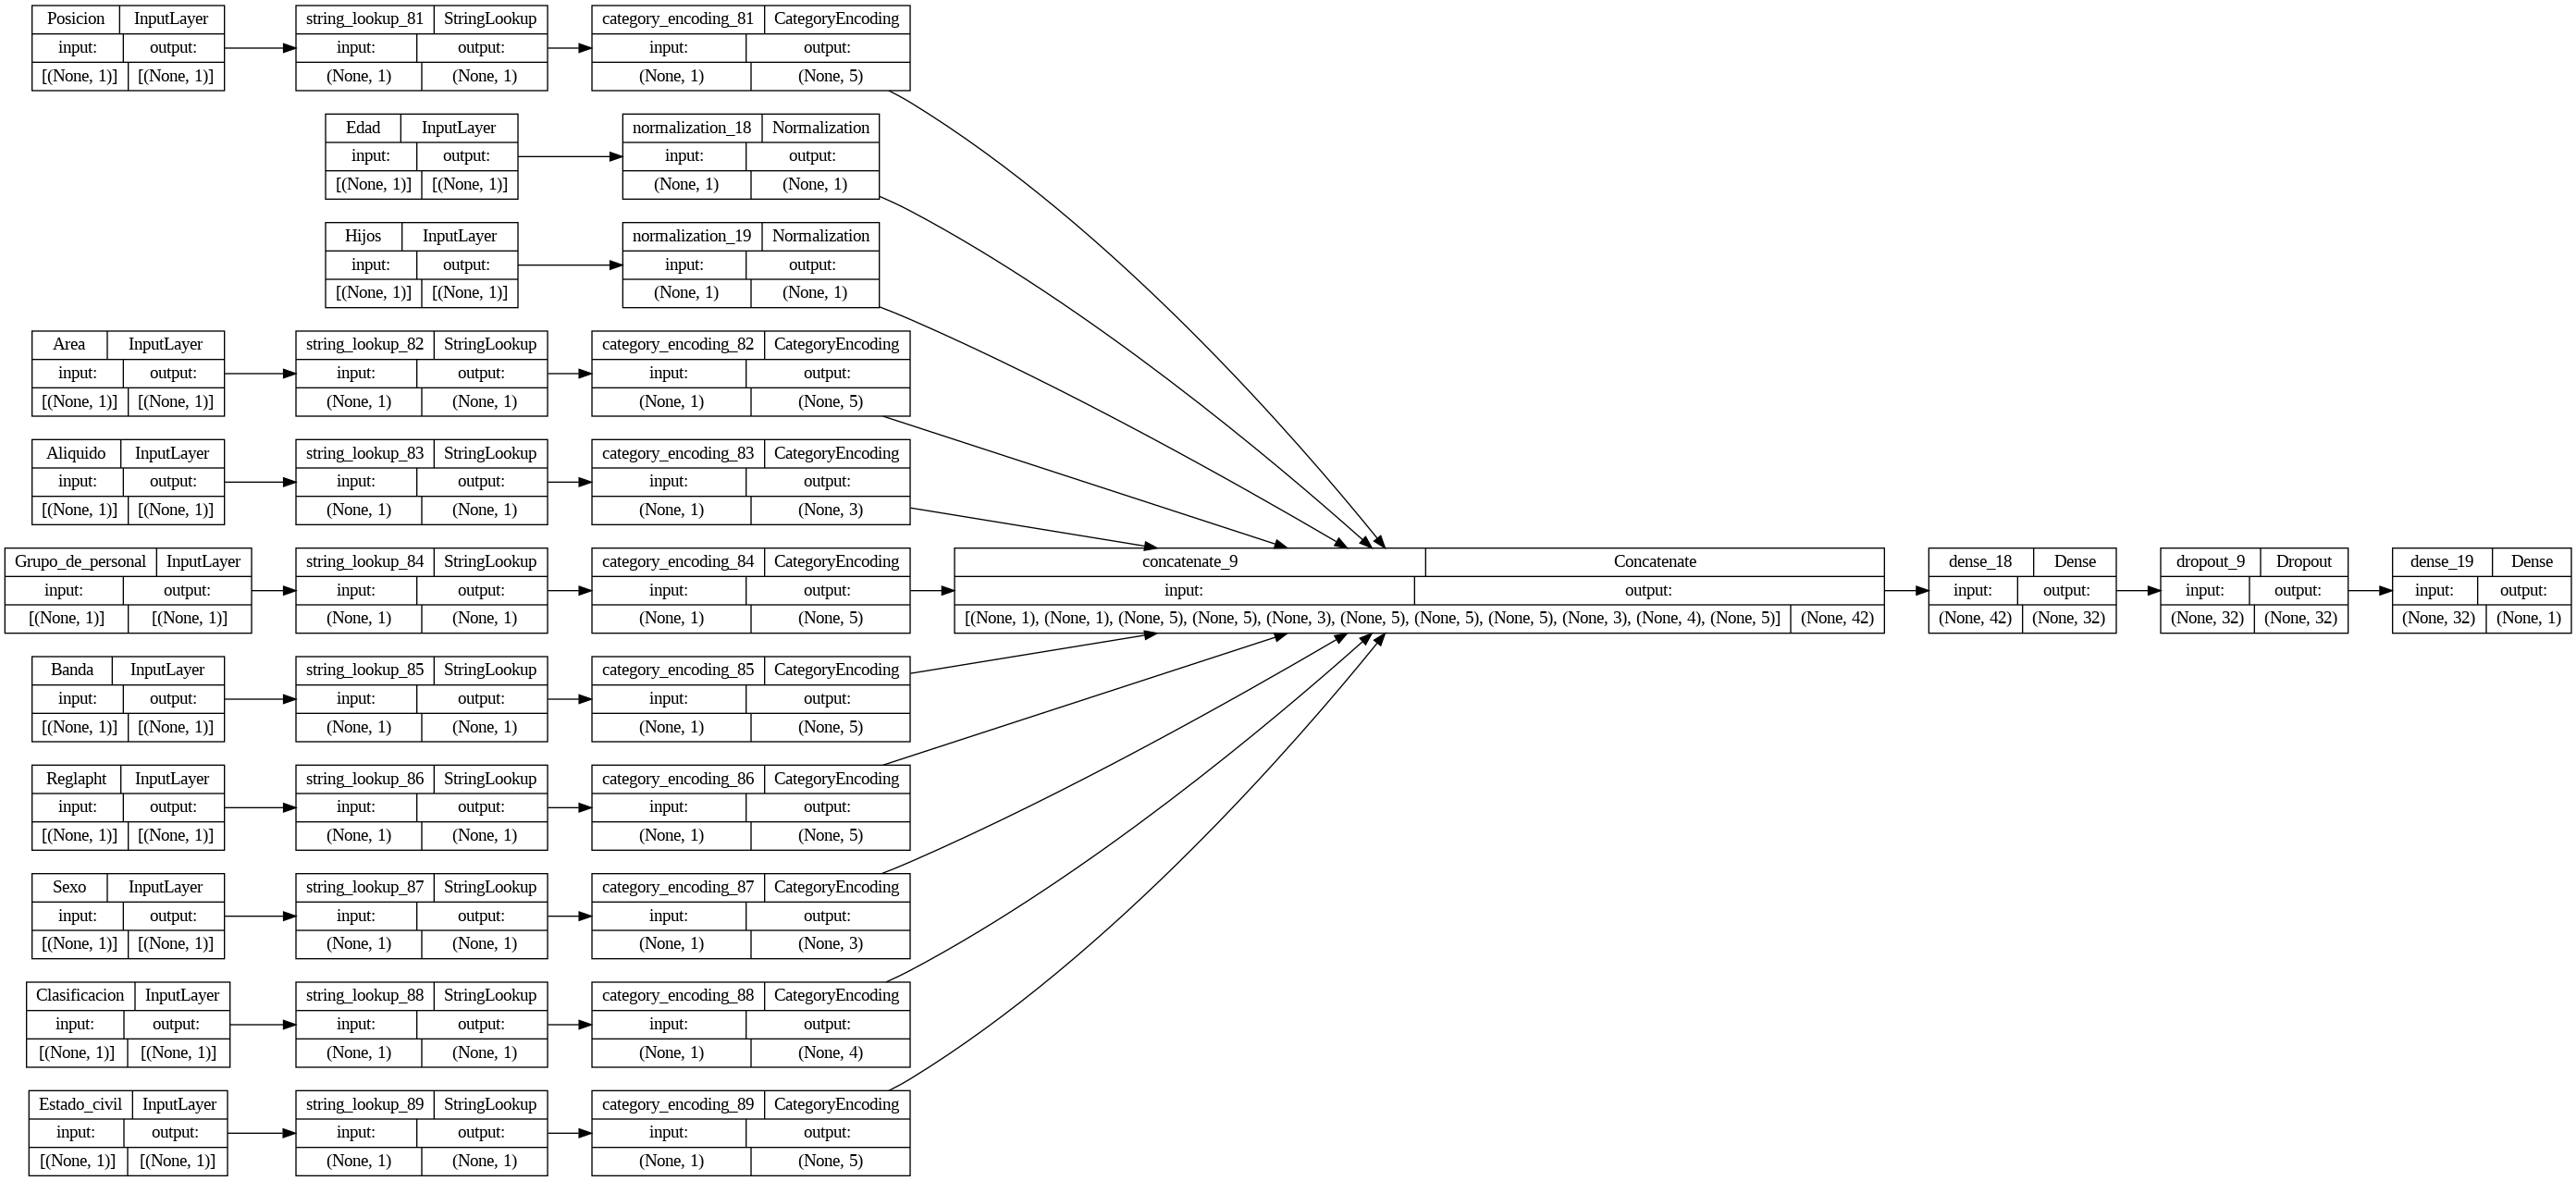

In [25]:
# rankdir='LR' is used to make the graph horizontal.
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")